In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date
import os

9170
<class 'numpy.float64'>
0.08
9171
<class 'numpy.float64'>
0.08
9172
<class 'numpy.float64'>
0.08
9173
<class 'numpy.float64'>
0.08
9174
<class 'numpy.float64'>
0.08
9175
<class 'numpy.float64'>
0.1
9176
<class 'numpy.float64'>
0.1
9177
<class 'numpy.float64'>
0.1
9178
<class 'numpy.float64'>
0.3
9179
<class 'numpy.float64'>
0.35
9180
<class 'numpy.float64'>
0.38
9181
<class 'numpy.float64'>
0.38
9182
<class 'numpy.float64'>
0.38
9183
<class 'numpy.float64'>
0.38
9184
<class 'numpy.float64'>
0.38
9185
<class 'numpy.float64'>
0.38
9186
<class 'numpy.float64'>
0.38
9187
<class 'numpy.float64'>
0.38
9188
<class 'numpy.float64'>
0.35
9189
<class 'numpy.float64'>
0.35
9190
<class 'numpy.float64'>
0.4
9191
<class 'numpy.float64'>
0.4
9192
<class 'numpy.float64'>
0.46
9193
<class 'numpy.float64'>
0.46
9194
<class 'numpy.float64'>
0.46
9195
<class 'numpy.float64'>
0.46
9196
<class 'numpy.float64'>
0.46
9197
<class 'numpy.float64'>
0.45
9198
<class 'numpy.float64'>
0.45
9199
<class 'numpy.f

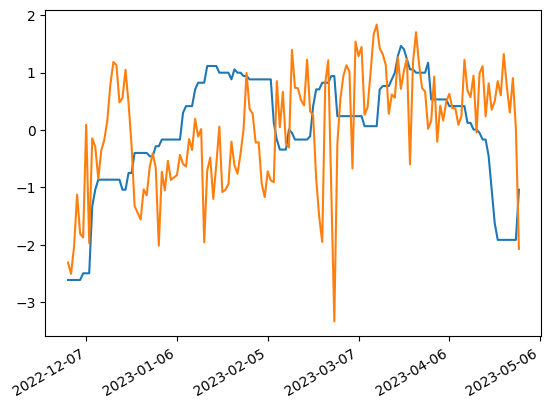

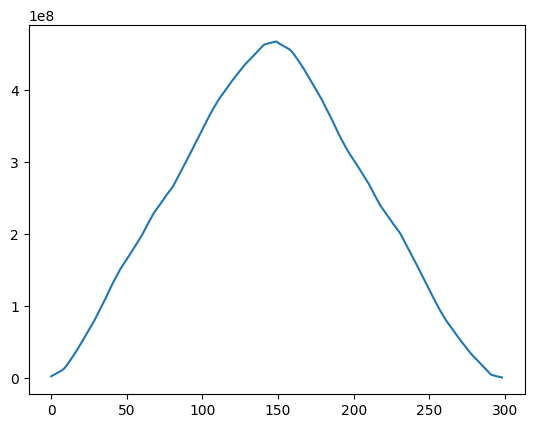

In [ ]:

data  = pd.read_csv('smhi-opendata_8_40_181970_20241206_130415.csv', sep=';')
#data  = pd.read_csv('onsala.csv', sep=';')
#data  = pd.read_csv('Kiruna.csv', sep=';')
#data  = pd.read_csv('Kiruna.csv', sep=';')

#data['Datum'] = pd.to_datetime(data['Datum'])

mask = (data['Datum'] >= '2022-12-01') & (data['Datum'] <= '2023-04-10')
data = data.loc[mask]

dir = "gps_data/GRE/"

data['gps_z'] = np.nan

idx_drop = []

for row in data.itertuples():
    try:
        file = open(dir + str(row[1]) + "_30KIR8.stacov", 'r')
        file_data = file.readlines()
        coords = file_data[3].split()
        #print(row[0])
        #print(row[1])
        #print(float(coords[4]))
        #data.loc['gps_z'][row[0]] = float(coords[4])
        data.at[row[0], 'gps_z'] = float(coords[4])
        file.close()
        
        print(row[0])
        print(type(data.at[row[0], 'Snödjup']))
        print(data.at[row[0], 'Snödjup'])
        

        if np.isnan(data.at[row[0], 'Snödjup']):
            print("hej")
            data.at[row[0], 'Snödjup'] = data.at[row[0] - 1, 'Snödjup']
    except:
        print(row[1])
        print("couldnt find")
        data.at[row[0], 'gps_z'] = data.at[row[0]-1, 'gps_z']
        idx_drop.append(row[0])
        continue

#data.drop(idx_drop)

    #print(type(coords[4]))
    



pd.to_datetime(data['Datum'])

cross = np.correlate(data['gps_z'], data['Snödjup'], mode='full')
mean = data['gps_z'].mean()
#fig, ax = plt.subplots(figsize=(5.4, 2),)
#datums = data['Datum']
#datums = pd.to_datetime(np.datetime64['ns'])

x = [datetime.strptime(d,'%Y-%m-%d').date() for d in data['Datum']]

print(len(data['gps_z']))
print(len(data['Snödjup']))

avg_z = data['gps_z'].mean()
std_z = data['gps_z'].std()

avg_depth = data['Snödjup'].mean()
std_depth = data['Snödjup'].std()

#ax1.plot((data['gps_z']-avg_z))


#ax12 = ax1.twinx()
#ax12.plot((data['Snödjup']), color='tab:red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(x,(data['Snödjup']-avg_depth)/std_depth)
plt.plot(x, (data['gps_z']-avg_z)/std_z)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.show()

#print(type(data.at[8780, 'Datum']))

plt.figure()

plt.plot(cross)



ztd/GRE/2024-01-03_10KIR0.trp
ztd/GRE/2024-01-04_10KIR0.trp
ztd/GRE/2024-01-05_10KIR0.trp
ztd/GRE/2024-01-06_10KIR0.trp
ztd/GRE/2024-01-07_10KIR0.trp
ztd/GRE/2024-01-08_10KIR0.trp
ztd/GRE/2024-01-09_10KIR0.trp
ztd/GRE/2024-01-10_10KIR0.trp
ztd/GRE/2024-01-11_10KIR0.trp


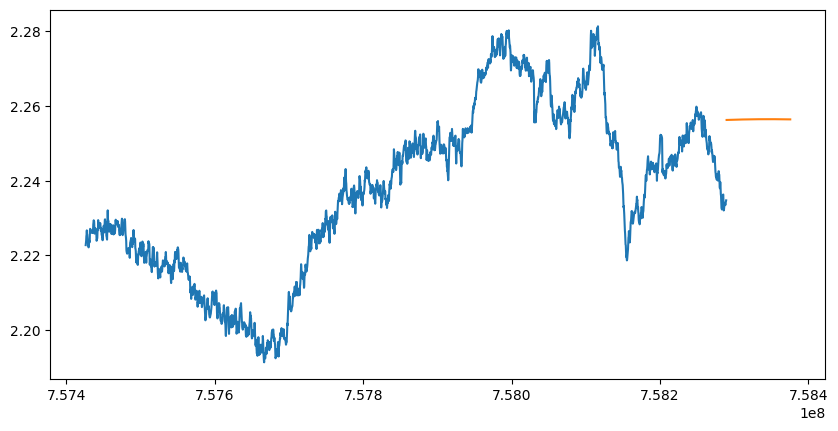

In [7]:
from datetime import date, timedelta
dir = "ztd/GRE/"

def daterange(start_date: date, end_date: date):
    days = int((end_date - start_date).days)
    for n in range(days):
        yield start_date + timedelta(n)
        

station1 = np.genfromtxt(dir + str(date(2024,1,2)) + "_10KIR0.trp", delimiter=' ', skip_header=1)
station2 = np.genfromtxt(dir + str(date(2024,1,2)) + "_10KIRU.trp", delimiter=' ', skip_header=1)

for datex in daterange(date(2024,1,3), date(2024,1,12)):
    print(dir + str(datex) + "_10KIR0.trp")
    stat1 = np.genfromtxt(dir + str(datex) + "_10KIR0.trp", delimiter=' ', skip_header=1)
    stat2 = np.genfromtxt(dir + str(datex) + "_10KIRU.trp", delimiter=' ', skip_header=1)
    #print(stat1)
    station1 = np.append(station1, stat1, axis=0)
    station2 = np.append(station2, stat2, axis=0)

temp1 = station1[:,1] + station1[:,3]
temp1 = station2[:,1] + station2[:,3]

x = np.arange(len(temp1))
err = station1[:,2]

stat1 = np.genfromtxt(dir + str(date(2024,1,12)) + "_10KIR8.trp", delimiter=' ', skip_header=1)

p = np.polyfit(station1[:,0], temp1, 2)

fitp = np.poly1d(p)

plt.figure().set_figwidth(10)

temp10 = fitp(stat1[:,0])
temp20 = stat1[:, 1]
temp30 = temp10

plt.plot(station1[:,0], temp1,'-', stat1[:,0], temp30)

